# Module Three Final Project

For: XX

By: Jonathan E Ericksen, JE Consulting

## Background
> xx

## Objective:
> xx

## Question:
> xx

## Methodology:

> This project loosely follows the industry standard OSEMiN process. The 5 stages in OSEMiN are outlined in the table of contents below with each stage highlighted within the ensuing notebook.

## Table of Contents:<a id='top'></a>
> #### [Obtain](#obtain): 
- Sourcing the data
- Importing data

> #### [Explore](#explore): 
- Data preprocessing, cleaning & wrangling
- xx

> #### [Condition](#condition):
- xx

> #### [Model](#model):
- Initial Model
- Initial Model Interpretation & Notes
- Data Rebalancing
- Feature engineering
- Hyperparameter tuning
- Initial Cost Benefit analysis
- Model iterations
- Final model

> *(non-OSEMiN additions)*
- **[Cost Benefit Analysis](#costbenefitanalysis)**
- **[Conclusions](#conclusion)**
    - Answer to our business question
- **[Recommendations](#recommendation)**
- **[Future Work](#futurework)**

------------------------------------------------------------------------------------------------------------------

Before we begin, let's import the necessary libraries for our project: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import warnings; warnings.simplefilter('ignore')


## Obtain <a id='obtain'></a>

[Back to top](#top)

The data used for this project comes from the UCI Machine Learning repository and be found here: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

Let's read the data from the CSV file into a pandas dataframe: 

------------------------------------------------------------------------------------------------------------------
## Explatory Data Analysis <a id='explore'></a>

[Back to top](#top)

We'll begin our exploratory analysis by calling the standard descriptive methods on the data frame to familiarize ourselves with the features, five point statistics and data types:

In [3]:
display(df.head())
display(df.tail())
display(df.describe())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Let's look at the data types as well as sum of any null values that may exist: 

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

None

In [5]:
display(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

------------------------------------------------------------------------------------------------------------------
## Condition<a id='condition'></a>

[Back to top](#top)

------------------------------------------------------------------------------------------------------------------
## Modeling <a id='model'></a>

[Back to top](#top)

#### Initial Model

Let's begin the modeling portion of the project by fitting our first model to the current data. We'll use the results of this model as our baseline from which improve the overall model performance by tuning the hyperparameters and feature engineering. We'll start by splitting the data into our training and testing sets:

In [25]:
x_train, x_test, y_train, y_test = train_test_split(feats, target, test_size = .20)

Fit the model:

In [26]:
logreg = LogisticRegression(random_state=11)
model_log = logreg.fit(x_train, y_train)

Now that we have our baseline model, let's see how it performs on our training set: 

In [27]:
y_hat_train = logreg.predict(x_train)
residuals = np.abs(y_train - y_hat_train)

print('Model Predictions:')
print()
print(pd.Series(residuals).value_counts())
print()
print(pd.Series(residuals).value_counts(normalize=True))
print('-' * 50)
print('Performance Metrics:')
print()
print('Recall: {}'.format(recall_score(y_train, y_hat_train)))
print('Precision: {}'.format(precision_score(y_train, y_hat_train))) 
print('Accuracy: {}'.format(accuracy_score(y_train, y_hat_train)))

Model Predictions:

0    8725
1    1139
Name: Revenue, dtype: int64

0    0.88453
1    0.11547
Name: Revenue, dtype: float64
--------------------------------------------------
Performance Metrics:

Recall: 0.3882047958522359
Precision: 0.7544080604534005
Accuracy: 0.884529602595296


The model performed decently well on the training set with a 88% accuracry score. Let's see how it performs on the testing set: 

In [28]:
y_hat_test = logreg.predict(x_test)
residuals = np.abs(y_test - y_hat_test)

print('Model Predictions:')
print()
print(pd.Series(residuals).value_counts())
print()
print(pd.Series(residuals).value_counts(normalize=True))
print('-'* 50)
print('Performance Metrics:')
print()
print('Recall: {}'.format(recall_score(y_test, y_hat_test)))
print('Precision: {}'.format(precision_score(y_test, y_hat_test))) 
print('Accuracy: {}'.format(accuracy_score(y_test, y_hat_test)))

Model Predictions:

0    2192
1     274
Name: Revenue, dtype: int64

0    0.888889
1    0.111111
Name: Revenue, dtype: float64
--------------------------------------------------
Performance Metrics:

Recall: 0.4
Precision: 0.7263681592039801
Accuracy: 0.8888888888888888


Again, not bad. The model returned about the same accuracy score as with the training set. The precision score dropped slightly but some variation here is to be expected. Because the training and testing scores are relatively aligned, we can be confident the model is not over fitted. 

Let's further analyze the test set results by visualizing the confusion matrix on the test set using seaborn: 

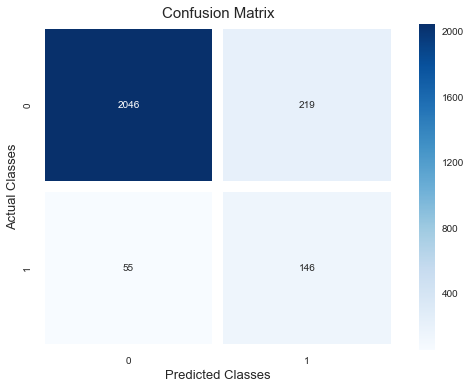

In [29]:
cnf_matrix = confusion_matrix(y_hat_test, y_test)

plt.figure(figsize=(8,6))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap= 'Blues', linewidths=10, )
plt.title('Confusion Matrix', size= 15)
plt.xlabel('Predicted Classes', size = 13)
plt.ylabel('Actual Classes', size = 13);

#### Notes on Initial Model Results

------------------------------------------------------------------------------------------------------------------
#### Rebalancing

During the EDA phase, we saw how our target feature was imbalanced. These imbalances can give us false confidence in some of our model evaluation metrics. To solve for this, we'll rebalance the data set using the SMOTE method: 

------------------------------------------------------------------------------------------------------------------

#### Feature Engineering

------------------------------------------------------------------------------------------------------------------
#### Hyperparameter Tuning

Now that we have solved for collinearity, baseline model fitted, the data has been normalized and rebalanced, and the most significant features identified, it's time to run the grid search to identify some suggested hyperparamaters for the remaining model iterations. We'll run our grid search using GridsearchCV package available with sklearn:

In [38]:
x_train, x_test, y_train, y_test = train_test_split(scaled_feats, scaled_target, test_size = .20)

grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'fit_intercept':['True', 'False'], 
        'class_weight': ['balanced', None]}

logreg = LogisticRegression(random_state=15)
logreg_cv = GridSearchCV(logreg,grid, cv=3)
logreg_cv.fit(x_train, y_train)

print("Tuned Hyperparameters: ",logreg_cv.best_params_)
print("Accuracy: ",logreg_cv.best_score_)

Tuned Hyperparameters:  {'C': 0.001, 'class_weight': None, 'fit_intercept': 'True', 'penalty': 'l1'}
Accuracy:  0.8375412293853074


 ------------------------------------------------------------------------------------------------------------------

#### Cost Benefit: Financial Implications

Before moving on with further model iterations, we'll take a step back and assess the financial implications for our logistic regression predictions with respect to the use case at Amazon Inc. Each model prediction will have an impact on Amazon's revenue. Let's break down the financial impact of these predictions:

- *True Negative:* **Cost** = ~125 dollars
    - Amazon will lose out on 125 dollars of revenue if a shopper does not make a purchase and is not offered the 10 percent discount.
- *False Positive:* **Cost** = ~237.5 dollars
    - Amazon will lose ~112.5 dollars in lost revenue if our model predicts a shopper will transact, but instead they do not. In this case, the model will instruct the website not to offer a 10 percent discount, thus lost opportunity to entice revenue from a potential sale is: 125 - discount of 12.5 = -112.5 dollars
    - Further, we'll factor in an additional revenue penalty that accounts for the portion of first time shoppers that do not transact. In this scenario, first time shoppers will not experience the seamless experience of shopping at Amazon and will be less likely to be repeat shoppers. This additional revenue penalty will equal 125 dollars in lost potential future revenue.
- *False Negative:* **Benefit** = ~112.5 dollars
    - Amazon will earn ~112.5 dollars in revenue if the model predicts a shopper will not transact, thus a 10 percent discount is offered, and the shopper makes the purchase: 125 - 12.5 percent discount = 112.5 dollars. 
- *True Positive:* **Benefit** = 200 dollars
     - Amazon will earn 125 dollars in revenue if our model correctly predicts a shoppers propensity to transact, thus no offer is made.
     - Further, additional revenue has been added to account for repeat shoppers. Visitors who experience shopping at Amazon are inclined to be repeat shoppers. Thus, additional revenue benefit of 75 dollars has been factored in.
     
*Key Assumptions:*
- *Figures are based on one shopping session*
- *Avg. shopping session purchase = ~125 dollars*
- *Avg. discount to entice shoppers to transact = ~10 percent*


***Target Metric: Precision***
- Based upon the financial impact analysis above, it's important going forward to build a model that limits Type I errors. Thus, we want a model that reflects high precision which limits the costs associated with false positive predictions. 

With these figures in mind, let's assign the appropriate cost/benefit revenue figures for each of the predictions our ensuing model iterations will produce:

In [268]:
TN = -125
FP = -237.5
FN = 112.5
TP = 200

------------------------------------------------------------------------------------------------------------------

#### Model Iterations

Now that have our suggested hyperparameters, let's iterate on a number of models to find the best parameters and features for optimizing precision.

We'll start here by defining a function that takes in the logreg variable with the desired parameters and returns the needed cost/benefit figures along with the precision score and confusion matrix. We'll use this function for our model iterations

In [269]:
def model(logreg):
    model_log = logreg.fit(x_train, y_train)

    y_hat_test = logreg.predict(x_test)
    y_hat_train = logreg.predict(x_train)
    y_test_score = logreg.decision_function(x_test)
    y_train_score = logreg.decision_function(x_train)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
    
    print('Models Test Data Precision: {}'.format(precision_score(y_test, y_hat_test).round(3))) 
    
    print('Train Data AUC: {}'.format(auc(train_fpr, train_tpr).round(3)))
    print('Test Data AUC: {}'.format(auc(test_fpr, test_tpr).round(3)))
    
    cnf_matrix = confusion_matrix(y_test, y_hat_test)
   
    tn_cost = ((cnf_matrix[0][0] / len(y_test)) * TN)
    fp_cost = ((cnf_matrix[0][1]/len(y_test)) * FP)
    fn_ben = ((cnf_matrix[1][0]/len(y_test)) * FN)
    tp_ben = ((cnf_matrix[1][1]/len(y_test)) * TP)
    
    print()
    print('Cost/Benefit = {} Dollars Per Shopping Session'.format((tn_cost+fp_cost+fn_ben+tp_ben).round(2)))
    print()
    
    plt.figure(figsize=(8,6))
    sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap= 'Blues', linewidths=10)
    plt.title('Confusion Matrix', size= 15)
    plt.xlabel('Predicted Classes', size = 13)
    plt.ylabel('Actual Classes', size = 13);
    
    print()
    
    plt.figure(figsize=(8,6))
    plt.plot(test_fpr, test_tpr, color = 'blue', lw = 2, label ='Test ROC curve')
    plt.plot(train_fpr, train_tpr, color = 'grey', lw = 2, label ='Train ROC curve')

    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.yticks([i/20.0 for i in range(21)])
    plt.xticks([i/20.0 for i in range(21)])

    plt.xlabel('False Positive Rate', size = 12)
    plt.ylabel('True Positive Rate', size = 12)
    plt.title('Receiver operating characteristic (ROC) Curve', size = 14)
    plt.legend(loc="lower right");
    

Next, we'll remove all features from the scaled_feats data set beside 'PageValues','Administrative', 'ProductRelated', 'BounceRates' for running the next iteration of models:

In [270]:
scaled_feats = scaled_feats[['PageValues', 'Administrative', 'ProductRelated', 'BounceRates']]

We'll split a new training and testing set with the remaining features and our target:

In [271]:
x_train, x_test, y_train, y_test = train_test_split(scaled_feats, scaled_target, test_size = .20)

***Model 1***
- Suggested hyperparameters from grid search
- Four features deemed significant based on high coefficients and correlation with the target variable

Let's instantiate the Logistic Regression method with the appropriate parameters:

In [272]:
logreg = LogisticRegression(penalty = 'l1', class_weight = 'balanced', fit_intercept = True, C = .001)

And run our first model:

Models Test Data Precision: 0.887
Train Data AUC: 0.906
Test Data AUC: 0.909

Cost/Benefit = 23.57 Dollars Per Shopping Session




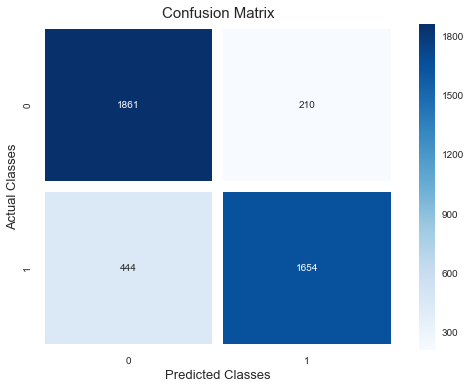

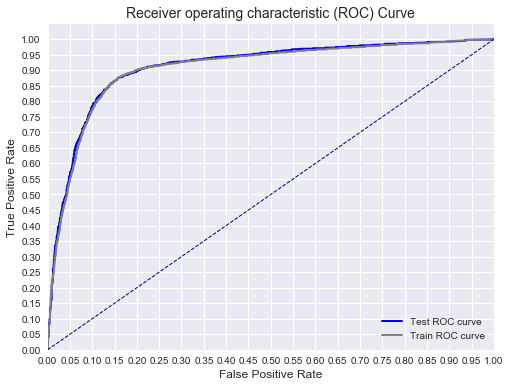

In [273]:
model(logreg)

***Model 2***
- Hyperparameters we've chosen ourselves
- Four features deemed significant based on high coefficients and correlation with the target variable

In [274]:
logreg = LogisticRegression(penalty = 'l2', fit_intercept = True, C = .001, max_iter = 100, tol = 0.0001)

Models Test Data Precision: 0.871
Train Data AUC: 0.896
Test Data AUC: 0.9

Cost/Benefit = 21.5 Dollars Per Shopping Session




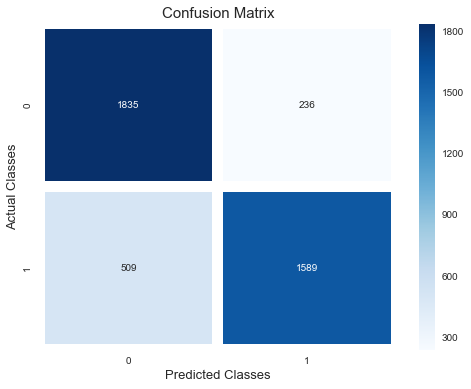

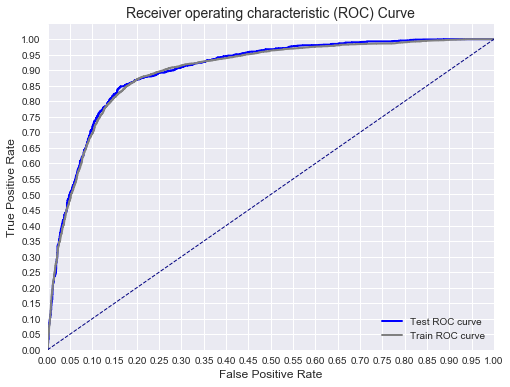

In [275]:
model(logreg)

***Model 3***
- Hyperparameters suggested by the grid search
- One feature suggested by the RFECV function and coefficients

We'll start here by removing all features beside 'PageValues' and generating another train_test_split with our single feature for running the final models:

In [276]:
scaled_feats = scaled_feats[['PageValues']]

In [277]:
x_train, x_test, y_train, y_test = train_test_split(scaled_feats, scaled_target, test_size = .20)

Instantiate a new Logistic Regression method with differing parameters and assign it to logreg variable:

In [278]:
logreg = LogisticRegression(penalty = 'l1', class_weight = 'balanced', fit_intercept = True, C = .001)

Models Test Data Precision: 0.91
Train Data AUC: 0.899
Test Data AUC: 0.897

Cost/Benefit = 23.89 Dollars Per Shopping Session




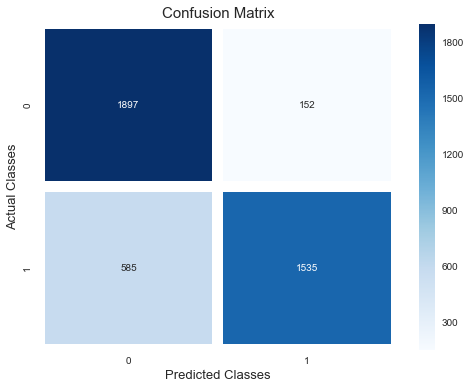

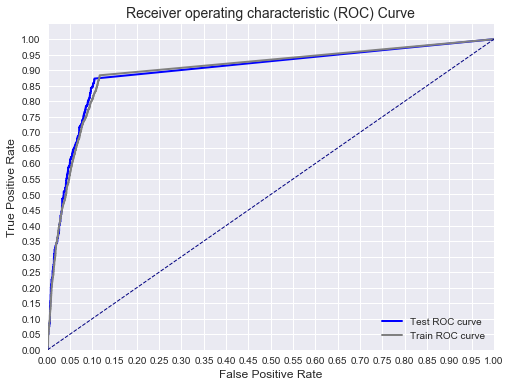

In [279]:
model(logreg)

***Model 4***
- Hyperparameters we've chosen ourselves
- One feature suggested by the RFECV function and coefficients

In [280]:
logreg = LogisticRegression(penalty = 'l2', fit_intercept = True, C = .001, max_iter = 100, tol = 0.0001)

Models Test Data Precision: 0.921
Train Data AUC: 0.899
Test Data AUC: 0.897

Cost/Benefit = 20.9 Dollars Per Shopping Session




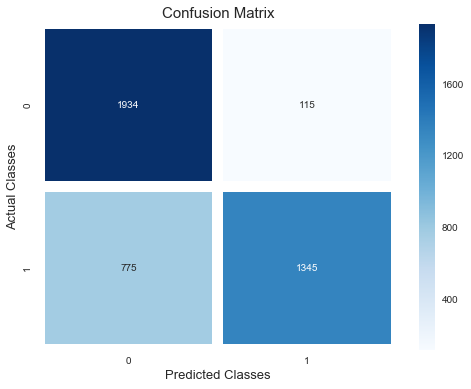

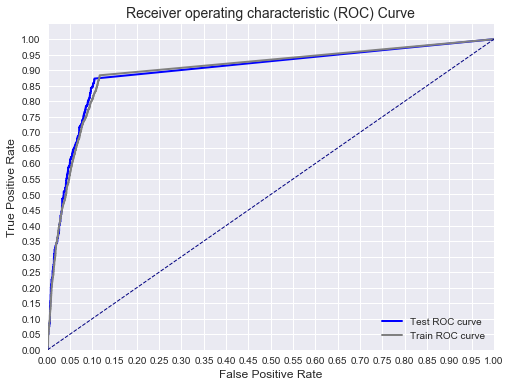

In [281]:
model(logreg)

------------------------------------------------------------------------------------------------------------------

#### Final Model

------------------------------------------------------------------------------------------------------------------

## Cost Benefit Analysis Result <a id='costbenefitanalysis'></a>

[Back to top](#top)

------------------------------------------------------------------------------------------------------------------
## Conclusion <a id='conclusion'></a>

[Back to top](#top)

**Question:** xx

**Answer:** xx

------------------------------------------------------------------------------------------------------------------
## Recommendations <a id='recommendation'></a>

[Back to top](#top)

------------------------------------------------------------------------------------------------------------------
## Future Work <a id='futurework'></a>

[Back to top](#top)